# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Ali Nourian
2.   Student Number: 98102527


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [32]:
dataset = pd.read_csv("data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

r = np.arange(0, len(dataset))
np.random.shuffle(r)
threshold = int(0.8 * len(dataset))

train_index = r[:threshold]
test_index = r[threshold:]

x_train = np.array(dataset.X[train_index])
y_train = np.array(dataset.Y[train_index])


x_test = np.array(dataset.X[test_index])
y_test = np.array(dataset.Y[test_index])


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
D = len(x_train)
A = np.concatenate((x_train.reshape(D, 1), np.ones((D, 1))), axis=1)

m = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y_train)

print(m)

[-1.03117851  0.83816766]


In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = 1. / len(x_train) * ((predicted_train_y - y_train) ** 2).sum()
test_error = 1. / len(x_test) * ((predicted_test_y - y_test) ** 2).sum()

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.329526709345841
MSE test error: 0.33514749896835233


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

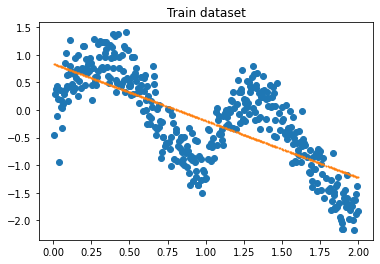

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

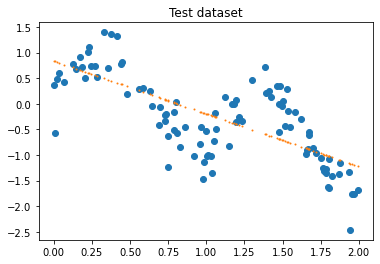

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
**Were the reported accuracies acceptable?**

The mean square error is not too large (Also it's not too small). Just by looking at the MSE we can say it may be acceptable.

**What about the line you drew in the last part?**
**Was it appropriate for the dataset?**

No. As we can see in the figures above, the predicted line isn't close enough to the original data. The structure or shape of the data is not linear. So it's not appropriate to fit a line to the dataset.

<br><br/>
**Explain what are the main problems here.**

The main problem is we take a wrong model to fit the data. It's important to find the best model to fit the data. As we can see the shape of the data is not linear in the whole x-axis, so we can not fit a line to the whole dataset. It's better to check some curves or higher order polynomial to fit the data to find the better solution.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, the plot shows that we can estimate the points with 4 or more lines to get the higher accuracy. By separating the x-axis to some continuous parts and fit a line for each separated parts.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.eye(l)

    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-1.0 / (2 * hyperparameter ** 2) * (xi - the_query_point).dot((xi - the_query_point).T))

    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]

    X = np.hstack((train_X.reshape(l, 1), np.ones((l, 1))))
    qx = np.array([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.pinv(X.T.dot(W.dot(X))).dot(X.T.dot(W.dot(train_Y)))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [21]:
hyperparameter = 0.04

predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = ((predicted_test - y_test) ** 2).mean()
print(f"MSE test error: {error}")

MSE test error: 0.0997197009606312


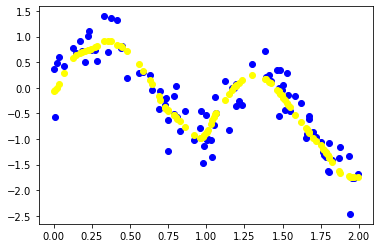

In [22]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

-write here-

Yes. It's obvious that the new model fit the data so much better than the previous one. The new predictions have the same shape and structure as the original dataset, but the previous one didn't.

As we can see the predicted model predicts the points mush closer to the exact points than previous model.

Also the MSE has been reduced from 0.3351 to 0.0997

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

-write here-

Yes, for this dataset KNN is also a good model.

### Part10:
Implementing the `KNN model`.

In [23]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = abs(x1 - x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = self.distance(self.X, x)
        indices = np.argpartition(distances, self.k)[:k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        nearest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[nearest_indices], axis=0)
        return predicted_y

In [24]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = ((predicted_y - y_test) ** 2).mean()
    return error, predicted_y

In [52]:
k = 10

error_knn_train, predicted_y = evaluation(k, x_train, y_train, x_train, y_train)
print(f"MSE error of KNN for train dataset: {error_knn_train}")

error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for train dataset: 0.08211991220370232
MSE error of KNN for test dataset: 0.11667123699364801


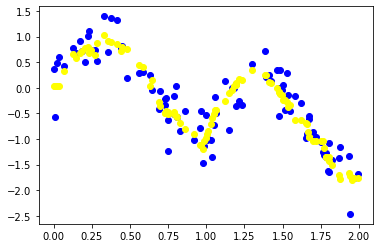

In [30]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

In [50]:
# cross validation

D = len(dataset)

knn_train_errors = []
knn_test_errors = []

for k in np.arange(2, 20):
  step = int(D / 5)
  tresh = 0
  while True:
    tresh += step
    train_index = np.arange(start=tresh-step, stop=tresh)
    test_index = np.concatenate((np.arange(start=0, stop=tresh-step), np.arange(start=tresh, stop=D)))

    x_train = np.array(dataset.X[train_index])
    y_train = np.array(dataset.Y[train_index])

    x_test = np.array(dataset.X[test_index])
    y_test = np.array(dataset.Y[test_index])

    error_knn_train, predicted_y = evaluation(k, x_train, y_train, x_train, y_train)
    knn_train_errors.append(error_knn_train)
    # print(f"MSE error of KNN for train dataset: {error_knn_train}")

    error_knn_test, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
    knn_test_errors.append(error_knn_test)
    # print(f"MSE error of KNN for test dataset: {error_knn_test}")

    if tresh == D:
      break
  print(f"K = {k}:  \n\tAverage MSE error of KNN for train dataset: {np.mean(knn_train_errors)}\n\tAverage MSE error of KNN for test dataset: {np.mean(knn_test_errors)}\n")

K = 2:  
	Average MSE error of KNN for train dataset: 0.04743859203255442
	Average MSE error of KNN for test dataset: 0.1284869264606673

K = 3:  
	Average MSE error of KNN for train dataset: 0.05447072389317516
	Average MSE error of KNN for test dataset: 0.12367006990885807

K = 4:  
	Average MSE error of KNN for train dataset: 0.05865869485371711
	Average MSE error of KNN for test dataset: 0.12093609179363825

K = 5:  
	Average MSE error of KNN for train dataset: 0.06229281922886968
	Average MSE error of KNN for test dataset: 0.11921237854289532

K = 6:  
	Average MSE error of KNN for train dataset: 0.06498241328397392
	Average MSE error of KNN for test dataset: 0.11809925742133175

K = 7:  
	Average MSE error of KNN for train dataset: 0.06710075040386124
	Average MSE error of KNN for test dataset: 0.11733734813685405

K = 8:  
	Average MSE error of KNN for train dataset: 0.06887830075331493
	Average MSE error of KNN for test dataset: 0.11667620318723458

K = 9:  
	Average MSE error 

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

-write here-

According to the result of last cell, K = 12 is the best one which in this case the test error is minimum in avarage.

Yes, the performance of the model is acceptable.